# Linear Regression

Linear regression is a statistical routine which can be used to predict non-categorical, non-labelled numerical data. Its implementation in Python is straightforward using `scikit-learn`.  
Here, artificially created data of some ECOMMERCE website is used. The aim is to explore how various factors correlate to the users' spending, and finally suggest avenues for improvements.

## Reading in data and first look

In [1]:
# begin with usual imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data
customers = pd.read_csv('Ecommerce Customers.csv')

In [3]:
# check DF head
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# check DF info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# check basic stat properties of numerical cols
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

In [6]:
# set seaborn theme (optional)
sns.set_theme(style = 'whitegrid', palette = 'viridis')

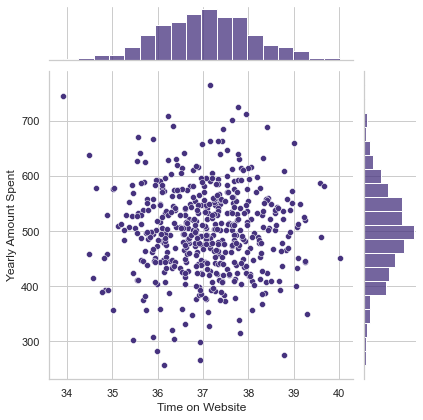

In [7]:
# first guess at a trend: more time on site --> more money spent: let's check
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers)
plt.show()

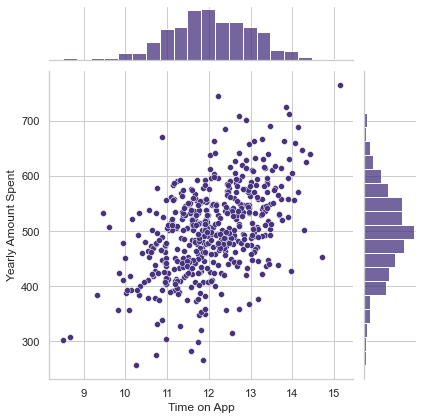

In [8]:
# check similar trend for time on app
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)
plt.show()

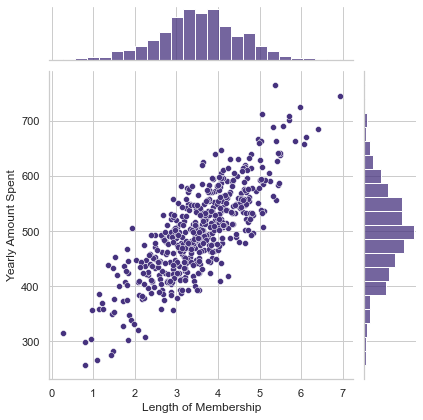

In [9]:
# check if membership length shows any correlation with spending
sns.jointplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)
plt.show()

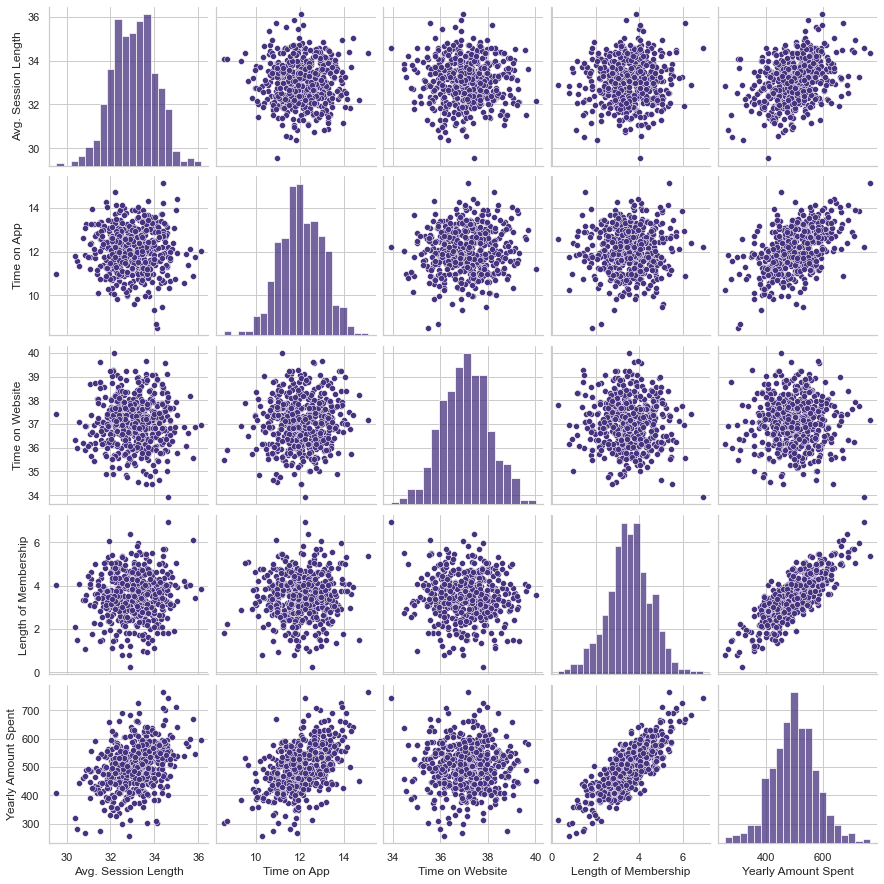

In [10]:
# explore relationships across data
sns.pairplot(customers)
plt.show()

Length of membership appears to be most positively correlated with yearly amount spent.

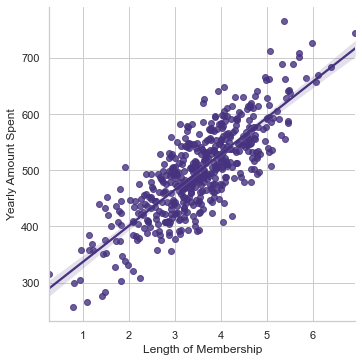

In [11]:
# regression plot of 'Yearly Amount Spent' vs. 'Length of Membership'
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)
plt.show()

## Linear Regression Analysis

In [12]:
# train-test splitting of data
from sklearn.model_selection import train_test_split

In [13]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 287)
# as splitting occurs randomly, use "random_state = 287" only to recreate my results exactly

In [15]:
# training the linear regression model
from sklearn.linear_model import LinearRegression

In [16]:
lr_mod = LinearRegression()

In [17]:
lr_mod.fit(X_train, y_train)

LinearRegression()

In [18]:
# print coefficients
coeffecients = pd.DataFrame(lr_mod.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.566399
Time on App,38.578039
Time on Website,0.656166
Length of Membership,61.421905


In [19]:
# predictions
predictions = lr_mod.predict(X_test)

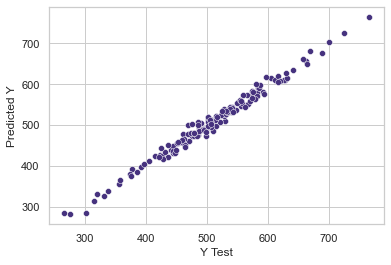

In [20]:
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [21]:
# model performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.257715570220036
Mean Squared Error: 108.73136493076939
Root Mean Squared Error: 10.427433285846014


In [22]:
# a basic estimate of model performance with context:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) / customers['Yearly Amount Spent'].mean()

0.02088351715928669

## Conclusion
The linear regression model does well to make predictions on this data.  
From the coefficients obtained by the model, and also from the exploratory data analysis it is clear that time spent on website correlates most poorly with the customers' yearly spending, while length of membership correlates most strongly with it. Time spent on the app as well as average length of a session also show strong correlation with yearly spending.  
This leads to two possible avenues of improvements: work on the shortcomings of the website, or focus on further strengthening those factors that already strongly correlate with high yearly spending. The decision would be made based on the priorities of the company.